## Análise do dataset gerado

### Bibliotecas

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ptl


### Leitura da base

In [50]:
df_soja= pd.read_parquet('C:/Users/JeffersonKauanCavalc/OneDrive - ILOS/Documentos/Trabalho Deep/src/data/Soja/df_soja.parquet')

In [51]:
dias = df_soja['Tempo_Estimado'].str.extract(r'(\d+)\s*dia').fillna(0).astype(int)

# 2. Extrair as Horas
horas = df_soja['Tempo_Estimado'].str.extract(r'(\d+)\s*h').fillna(0).astype(int)

# 3. Extrair os Minutos
minutos = df_soja['Tempo_Estimado'].str.extract(r'(\d+)\s*min').fillna(0).astype(int)

# 4. Calcular o total em horas
# (Dias * 24) + Horas + (Minutos / 60)
df_soja['Tempo_em_Horas'] = (dias * 24) + horas + (minutos / 60)

# Opcional: Arredondar para 2 casas decimais
df_soja['Tempo_em_Horas'] = df_soja['Tempo_em_Horas'].round(1)

### Análises

In [52]:
df_soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fluxo                    16466 non-null  object 
 1   Ano                      16466 non-null  int32  
 2   Mês                      16466 non-null  int16  
 3   Mês_Nome                 16466 non-null  object 
 4   Países                   16466 non-null  object 
 5   Descrição NCM            16466 non-null  object 
 6   Origem                   16466 non-null  object 
 7   Destino                  16466 non-null  object 
 8   UF_DESTINO               16429 non-null  object 
 9   Classificacao_Risco      16429 non-null  float64
 10  Distancia                16466 non-null  object 
 11  Tempo_Estimado           16466 non-null  object 
 12  Rodovias                 16466 non-null  object 
 13  Custo                    16466 non-null  object 
 14  Toneladas             

In [53]:
df_soja.isna().sum()

Fluxo                       0
Ano                         0
Mês                         0
Mês_Nome                    0
Países                      0
Descrição NCM               0
Origem                      0
Destino                     0
UF_DESTINO                 37
Classificacao_Risco        37
Distancia                   0
Tempo_Estimado              0
Rodovias                    0
Custo                       0
Toneladas                   0
Quilograma Líquido          0
Valor US$ FOB               0
Price USD/TON               8
Media_Dolar                 0
Taxa_Desemprego             0
Produto                     0
Unidade Comercialização     0
Preço Mínimo                0
Tempo_em_Horas              0
dtype: int64

In [54]:
df_soja=df_soja.dropna()

Text(0, 0.5, 'Países')

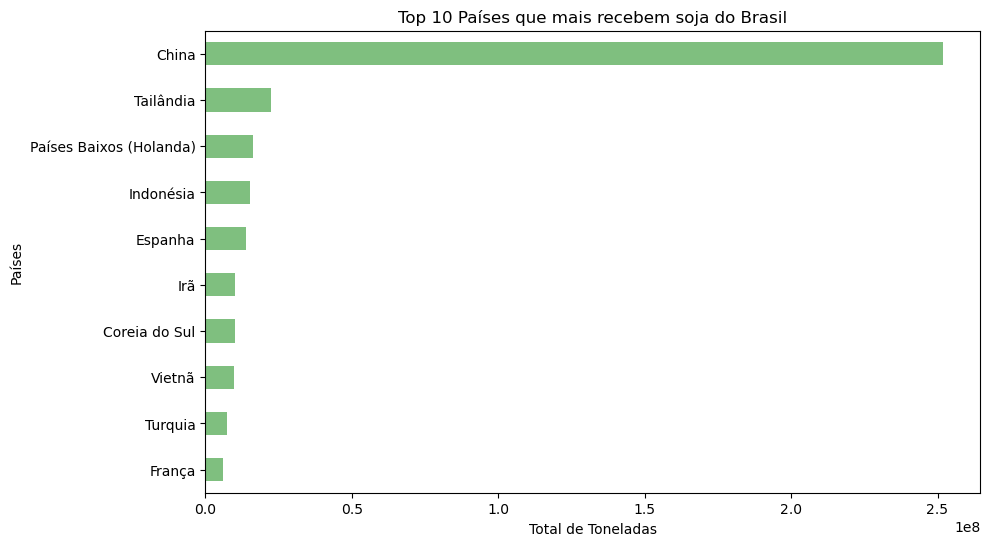

In [55]:
df_agrupado = df_soja.groupby('Países')['Toneladas'].sum().sort_values(ascending=True).tail(10)

# 2. PLOTAR
# Note que o figsize entra aqui dentro
df_agrupado.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Top 10 Países que mais recebem soja do Brasil')
plt.xlabel('Total de Toneladas')
plt.ylabel('Países')

Text(0, 0.5, 'Total de Toneladas')

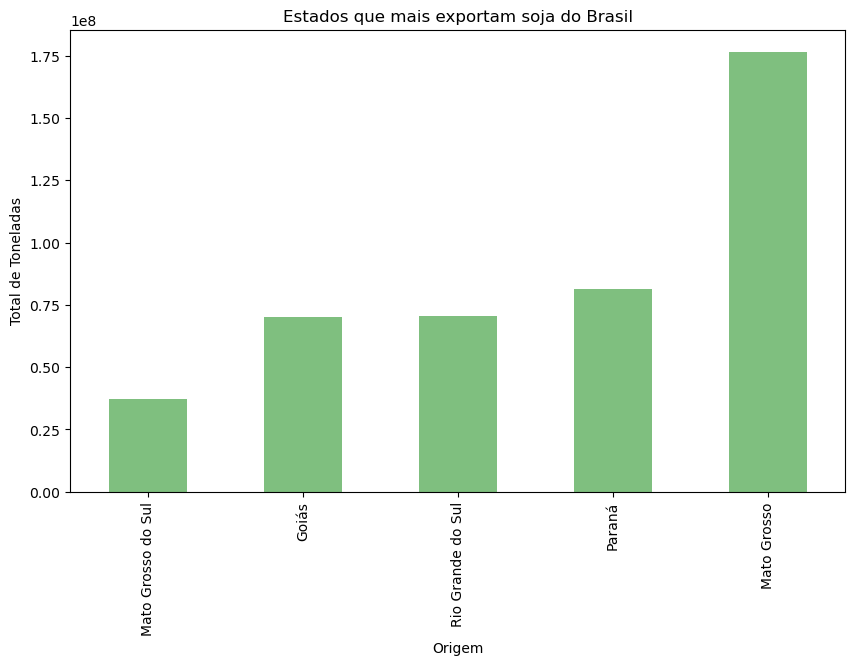

In [56]:
# Estados mais exportadores de soja do Brasil

df_agrupado = df_soja.groupby('Origem')['Toneladas'].sum().sort_values(ascending=True).tail(10)

# 2. PLOTAR
# Note que o figsize entra aqui dentro
df_agrupado.plot(kind='bar', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Estados que mais exportam soja do Brasil')
plt.xlabel('Origem')
plt.ylabel('Total de Toneladas')


Text(0, 0.5, 'Risco de Acidente(1 a 5)')

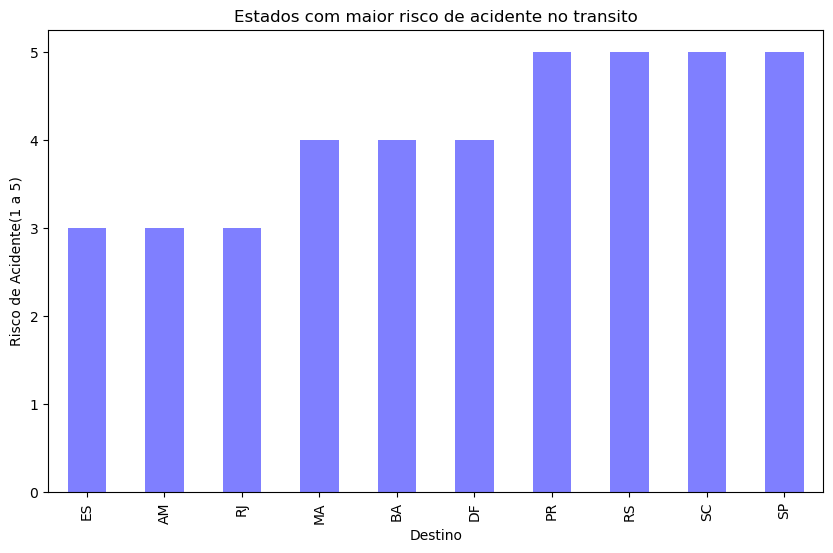

In [57]:
# Estados com maior risco no transito

df_agrupado = df_soja.groupby('UF_DESTINO')['Classificacao_Risco'].mean().sort_values(ascending=True).tail(10)

df_agrupado.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# Títulos e Eixos
plt.title('Estados com maior risco de acidente no transito')
plt.xlabel('Destino')
plt.ylabel('Risco de Acidente(1 a 5)')

Text(0, 0.5, 'Tempo em Horas')

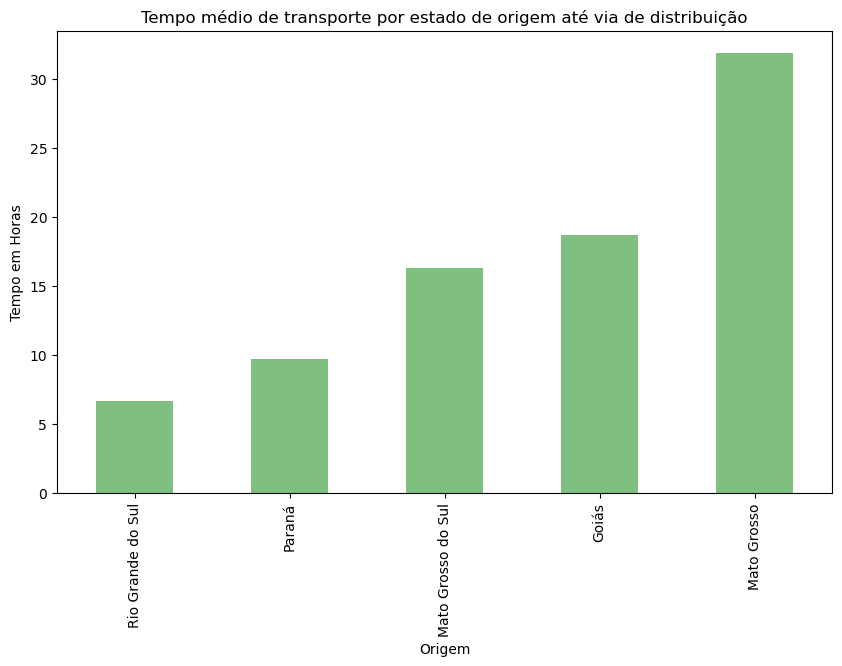

In [58]:
# Tempo medio de transporte por estado de origem até via de distribuição

df_agrupado = df_soja.groupby('Origem')['Tempo_em_Horas'].mean().sort_values(ascending=True).tail(10)

df_agrupado.plot(kind='bar', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Tempo médio de transporte por estado de origem até via de distribuição')
plt.xlabel('Origem')
plt.ylabel('Tempo em Horas')

Text(0, 0.5, 'Destinos')

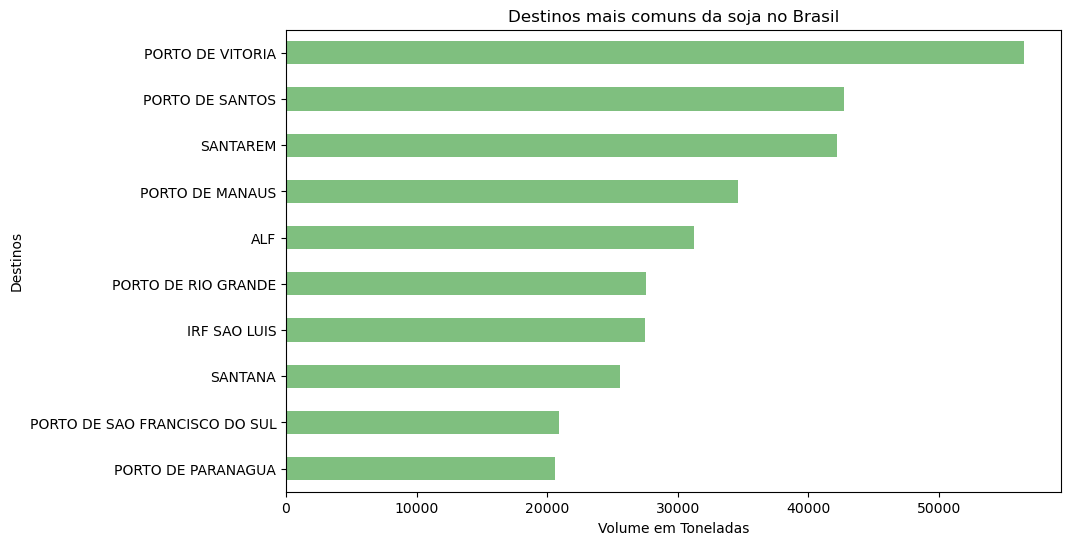

In [59]:
# Destinos mais comuns geral

df_agrupado = df_soja.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_agrupado.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns da soja no Brasil')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

Text(0, 0.5, 'Destinos')

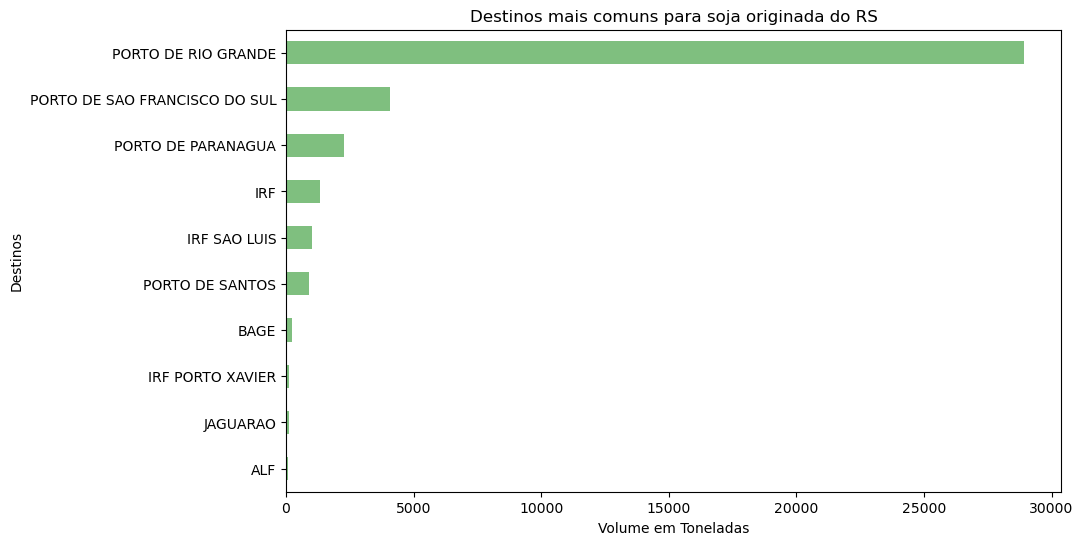

In [60]:
# Destinos mais comuns por estado de origem

df_RS= df_soja[df_soja['Origem'] == 'Rio Grande do Sul']

df_RS = df_RS.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_RS.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns para soja originada do RS')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

Text(0, 0.5, 'Destinos')

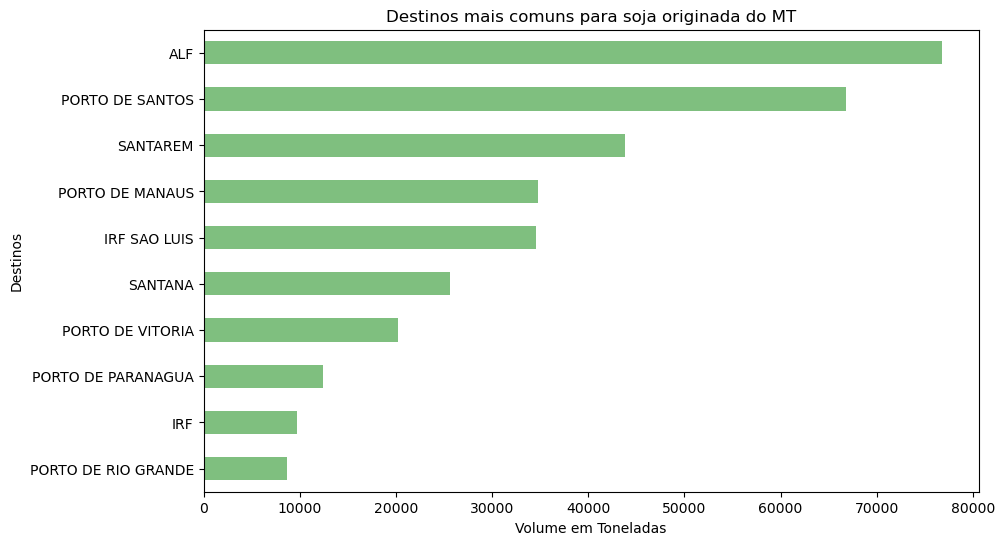

In [61]:
# Destinos mais comuns por estado de origem

df_MT= df_soja[df_soja['Origem'] == 'Mato Grosso']

df_MT = df_MT.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_MT.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns para soja originada do MT')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

Text(0, 0.5, 'Destinos')

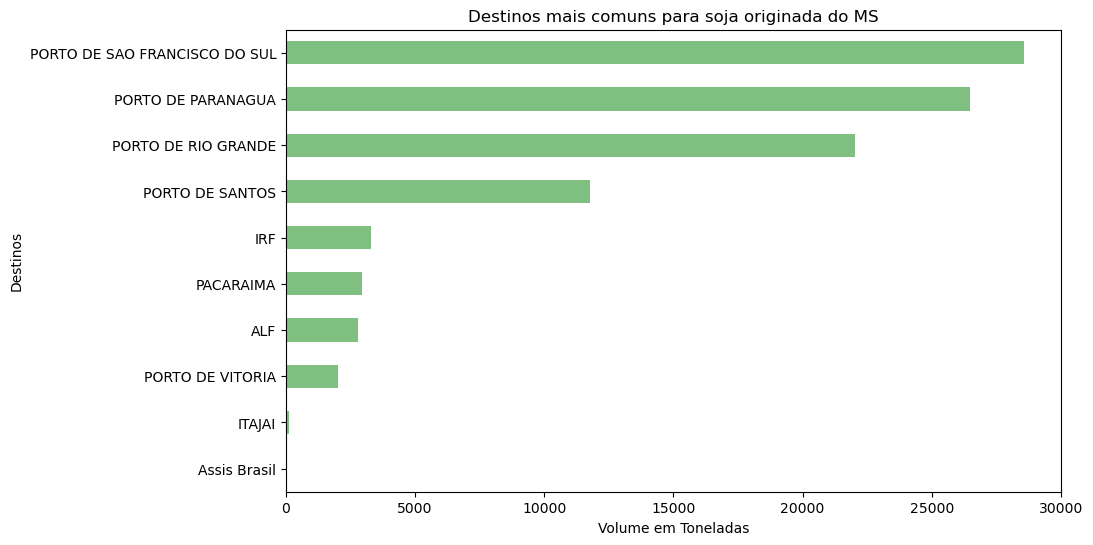

In [62]:
# Destinos mais comuns por estado de origem

df_MS= df_soja[df_soja['Origem'] == 'Mato Grosso do Sul']

df_MS = df_MS.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_MS.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns para soja originada do MS')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

Text(0, 0.5, 'Destinos')

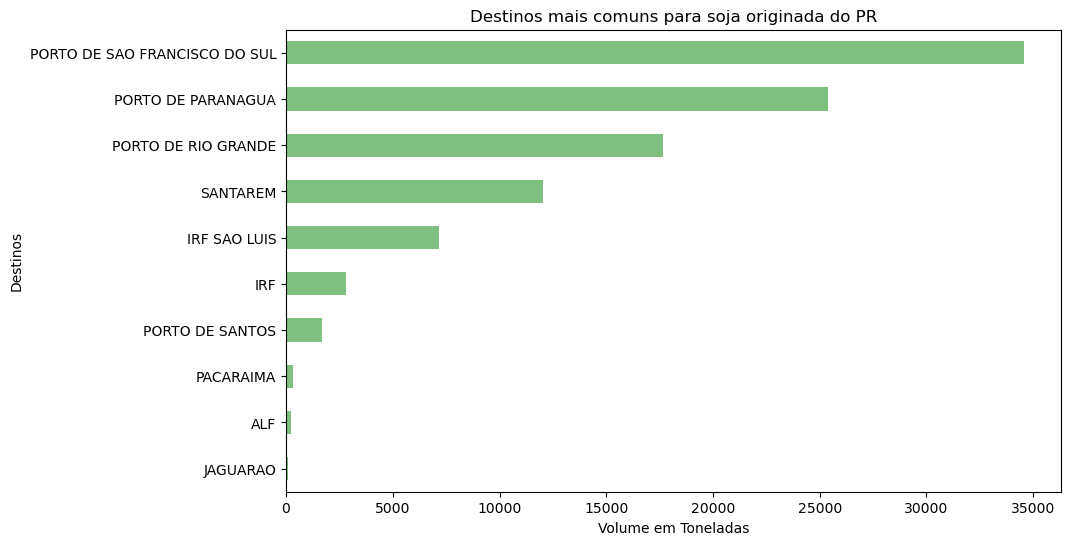

In [63]:
# Destinos mais comuns por estado de origem

df_PR= df_soja[df_soja['Origem'] == 'Paraná']

df_PR = df_PR.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_PR.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns para soja originada do PR')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

Text(0, 0.5, 'Destinos')

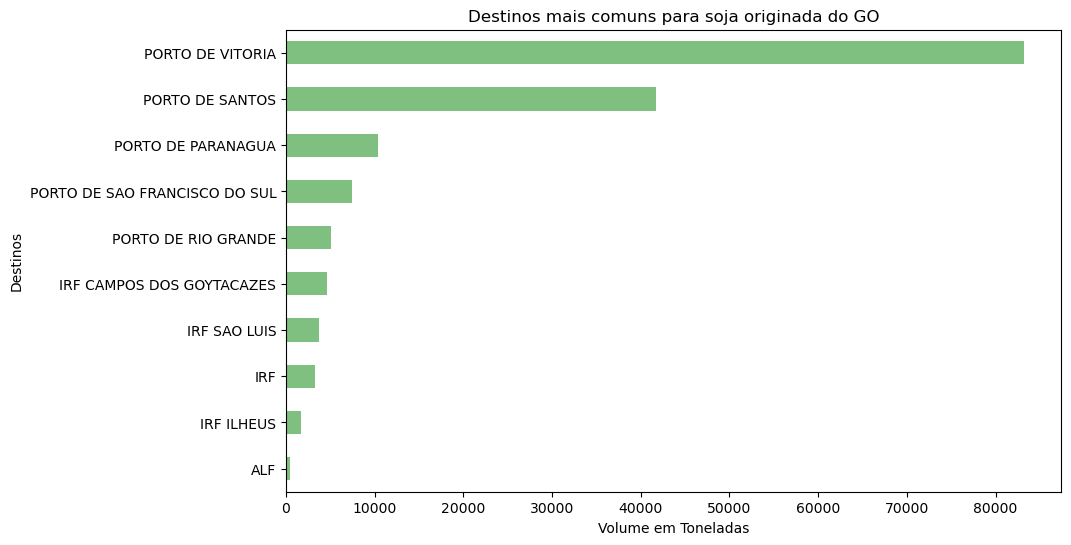

In [44]:
# Destinos mais comuns por estado de origem

df_GO= df_soja[df_soja['Origem'] == 'Goiás']

df_GO = df_GO.groupby('Destino')['Toneladas'].mean().sort_values(ascending=True).tail(10)

df_GO.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.5)

# Títulos e Eixos
plt.title('Destinos mais comuns para soja originada do GO')
plt.xlabel('Volume em Toneladas')
plt.ylabel('Destinos')

In [69]:
df_soja.columns

Index(['Fluxo', 'Ano', 'Mês', 'Mês_Nome', 'Países', 'Descrição NCM', 'Origem',
       'Destino', 'UF_DESTINO', 'Classificacao_Risco', 'Distancia',
       'Tempo_Estimado', 'Rodovias', 'Custo', 'Toneladas',
       'Quilograma Líquido', 'Valor US$ FOB', 'Price USD/TON', 'Media_Dolar',
       'Taxa_Desemprego', 'Produto', 'Unidade Comercialização', 'Preço Mínimo',
       'Tempo_em_Horas'],
      dtype='object')

KeyError: 'Price USD/TON'

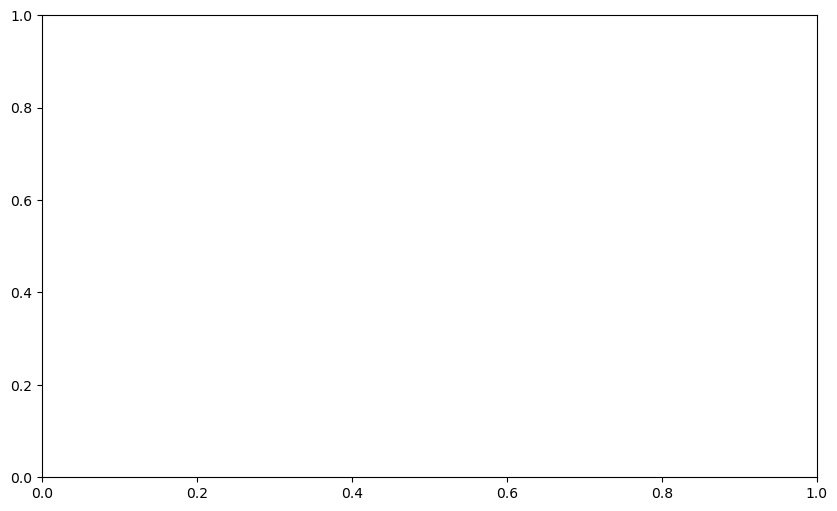

In [76]:
df_agrupado2 = df_soja.groupby('Ano')['Price USD/TON'].mean().sort_values(ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- EIXO 1 (Esquerda): As Barras Azuis ---
# Vamos supor que df_agrupado['Price USD/TON'] sejam as barras
ax1.bar(df_agrupado2.index, df_agrupado2['Price USD/TON'], color='lightblue', label='Price USD/TON')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Preço (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# --- EIXO 2 (Direita): A Linha Vermelha ---
# Cria um eixo gêmeo que compartilha o mesmo eixo X
ax2 = ax1.twinx() 

# Vamos supor que df_agrupado['Variação'] seja a linha
ax2.plot(df_agrupado2.index, df_agrupado2['Variação'], color='red', marker='o', linewidth=2, label='Variação')
ax2.set_ylabel('Variação (Índice)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título e Ajustes
plt.title('Comparação: Preço x Variação')

# Para mostrar as legendas de ambos os eixos juntas (truque opcional)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')